In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.drop('Cabin',axis=1,inplace=True)

In [7]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan,strategy='mean')
df[['Age']]=si.fit_transform(df[['Age']])

In [8]:
from sklearn.impute import SimpleImputer
si= SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['Embarked']]=si.fit_transform(df[['Embarked']])

In [9]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
features=df.iloc[:,2:]

In [11]:
target=df.iloc[:,[1]]
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


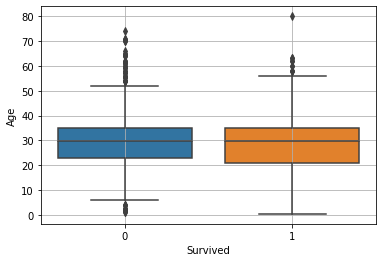

In [12]:
sns.boxplot(data=features,x=target['Survived'],y=features['Age'])
plt.grid()
plt.show()

In [13]:
features[(features.Age>51)&(target.Survived==0)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
33,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C
94,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,S
96,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,C
116,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,Q
124,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,S
152,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S
170,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,S
174,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,C


In [14]:
features.drop([6,33,54,94,96,116,124,152,170,174,232,249,252,262,280,317,326,438,456,467,487,432,492,493,545,555,582,625,626,659,672,684,694,695,714,745,772,851],inplace=True)

In [15]:
features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [16]:
features[(features.Age<8)&(target.Survived==0)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
16,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
50,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S
63,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
119,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,S
164,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,S
171,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.1250,Q
205,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,S
278,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.1250,Q
297,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,S


In [17]:
features.drop([7,16,50,63,119,164,171,205,278,297,374,386,642,813,824,850],inplace=True)

In [18]:
features[(features.Age>56)&(target.Survived==1)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
11,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
195,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C
268,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.0,0,1,PC 17582,153.4625,S
275,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,S
366,1,"Warren, Mrs. Frank Manley (Anna Sophia Atkinson)",female,60.0,1,0,110813,75.2500,C
483,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,S
570,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S
587,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,C
630,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,S
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,S


In [19]:
features.drop([11,195,268,275,366,483,570,587,630,823],inplace=True)

In [20]:
features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


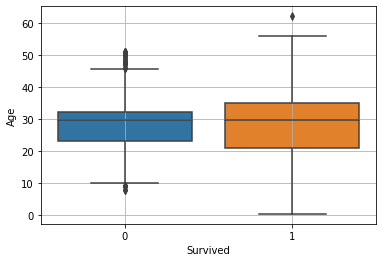

In [21]:
sns.boxplot(data=features,x=target['Survived'],y=features['Age'])
plt.grid()
plt.show()

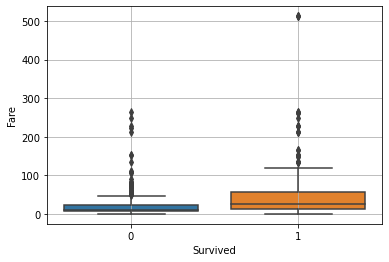

In [22]:
sns.boxplot(data=features,x=target['Survived'],y=features['Fare'])
plt.grid()
plt.show()

In [23]:
features[(features.Fare>50)&(target.Survived==0)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
34,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
35,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,S
62,1,"Harris, Mr. Henry Birkhardt",male,45.000000,1,0,36973,83.4750,S
72,2,"Hood, Mr. Ambrose Jr",male,21.000000,0,0,S.O.C. 14879,73.5000,S
92,1,"Chaffee, Mr. Herbert Fuller",male,46.000000,1,0,W.E.P. 5734,61.1750,S
102,1,"White, Mr. Richard Frasar",male,21.000000,0,1,35281,77.2875,S
110,1,"Porter, Mr. Walter Chamberlain",male,47.000000,0,0,110465,52.0000,S
118,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
120,2,"Hickman, Mr. Stanley George",male,21.000000,2,0,S.O.C. 14879,73.5000,S


In [24]:
df.drop([27,34,35,62,72,92,102,110,118,120,137,139,155,159,169,180,201,245,324,332,336,373,377,385,434,475,498,505,527,544,557,655,665,671,698,741,748,789,792,826,846,863,867],inplace=True)

In [25]:
features[(features.Fare>110)&(target.Survived==1)]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
31,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
88,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
215,1,"Newell, Miss. Madeleine",female,31.000000,1,0,35273,113.2750,C
258,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
269,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,S
299,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
305,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,S
306,1,"Fleming, Miss. Margaret",female,29.699118,0,0,17421,110.8833,C
311,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
318,1,"Wick, Miss. Mary Natalie",female,31.000000,0,2,36928,164.8667,S


In [26]:
df.drop([31,88,215,258,269,299,305,306,311,318,319,325,334,337,341,380,390,393,435,550,581,609,660,679,689,700,708,716,730,737,763,779,802,856],inplace=True)

In [27]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
features['Sex']=oe.fit_transform(features[['Sex']])
features['Embarked']=oe.fit_transform(features[['Embarked']])
features['Name']=oe.fit_transform(features[['Name']])
features['Ticket']=oe.fit_transform(features[['Ticket']])

In [28]:
features

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,100.0,1.0,22.000000,1,0,495.0,7.2500,2.0
1,1,176.0,0.0,38.000000,1,0,566.0,71.2833,0.0
2,3,330.0,0.0,26.000000,0,0,635.0,7.9250,2.0
3,1,254.0,0.0,35.000000,1,0,41.0,53.1000,2.0
4,3,15.0,1.0,35.000000,0,0,447.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,2,515.0,1.0,27.000000,0,0,87.0,13.0000,2.0
887,1,283.0,0.0,19.000000,0,0,12.0,30.0000,2.0
888,3,390.0,0.0,29.699118,1,2,641.0,23.4500,2.0
889,1,74.0,1.0,26.000000,0,0,6.0,30.0000,0.0


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features.iloc[:,:]=sc.fit_transform(features.iloc[:,:])

In [31]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [33]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [37]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

x[["Sex","Embarked"]]=oe.fit_transform(x[["Sex","Embarked"]])

In [38]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,0.0,38.000000,1,0,71.2833,0.0
2,3,0.0,26.000000,0,0,7.9250,2.0
3,1,0.0,35.000000,1,0,53.1000,2.0
4,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.000000,0,0,13.0000,2.0
887,1,0.0,19.000000,0,0,30.0000,2.0
888,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1.0,26.000000,0,0,30.0000,0.0


In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [42]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(xtrain,ytrain)

ypred=logreg.predict(xtest)

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac= accuracy_score(ytest,ypred)

cm= confusion_matrix(ytest,ypred)

cr= classification_report(ytest,ypred)

print(f"Accuracy: {ac}\n{cm}\n{cr}")

Accuracy: 0.763265306122449
[[124  31]
 [ 27  63]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       155
           1       0.67      0.70      0.68        90

    accuracy                           0.76       245
   macro avg       0.75      0.75      0.75       245
weighted avg       0.77      0.76      0.76       245



In [45]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)

print(f"Training Score: {train}\n Test Score: {test}")

Training Score: 0.8260105448154658
 Test Score: 0.763265306122449


In [47]:
df.Survived.value_counts()

0    506
1    308
Name: Survived, dtype: int64